In [52]:
import seaborn as sns
import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import requests
import json
import random
import folium
from folium.plugins import MarkerCluster
from branca.element import Template, MacroElement
KEY= "G5XlhCqsGp7pxVgAjGTFu04yYvnD8esq"


In [4]:
consumer_key =  '2XZ8WwA60fjcn30nUwMcZGNoZ'
consumer_secret = 'dlWKue8WH17vPRJO3bUJb9w4I1KJHQaD6MV7W0eTJFmeKQ6Gcm'
access_token = '753985003328012288-tPRbv9Za68YBLdelJEznkud2vJSkxQj'
access_token_secret = 'mEXfWUrHdwKLDLlqObzWsI9AHB6pdpnM1xNFH0IV8Pmju'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [5]:
tweets = []
for page in tweepy.Cursor(api.search , q="#trump" , count = 5,languages=["en"],tweet_mode='extended').pages(10):
    for tweet in page:
        hashtags_=[]
        urls=[]
        for hashtag in tweet.entities["hashtags"]:
            hashtags_.append(hashtag["text"])
#        for media in tweet.entities["media"]:
#            urls.append(media["expanded_url"])
        geo_url = "https://www.mapquestapi.com/geocoding/v1/address?key=KEY&inFormat=kvp&outFormat=json&location=LOCATION&thumbMaps=false".replace("KEY", KEY).replace("LOCATION",tweet.user.location)
        try:
            r = requests.get(url = geo_url)
            location = json.loads(r.content.decode('utf-8'))["results"][0]["locations"][0]["adminArea1"]
            coordinates = [json.loads(r.content.decode('utf-8'))["results"][0]["locations"][0]["latLng"]["lat"],json.loads(r.content.decode('utf-8'))["results"][0]["locations"][0]["latLng"]["lng"]]
        except:
            location = ""
            coordinates = []
        twe = {"text": tweet.full_text,
               "cleaned_text": " ".join([word for word in tweet.full_text.split() if word not in stopwords.words('english')]).replace("#","").replace("*",""),
               "location": location.lower(),
               "username": tweet.user.screen_name,
               "retweets": tweet.retweet_count,
               "favcount": tweet.user.favourites_count,
               "hastags": hashtags_,
               "coordinates" : coordinates,
               "sentiment": TextBlob(" ".join([word for word in tweet.full_text.split() if word not in stopwords.words('english')])).sentiment.polarity,
               "subjectivity": TextBlob(" ".join([word for word in tweet.full_text.split() if word not in stopwords.words('english')])).sentiment.subjectivity,
                }
        tweets.append(twe)


In [64]:
coord_dict = {}
for tweet in tweets:
    if tweet["location"]:
        coord_dict[tweet["location"]] = tweet["coordinates"]

In [7]:

locations = []
for tweet in tweets:
    if tweet["location"]:
        locations.append(tweet["location"])
        
        
from collections import Counter
myDict=Counter(locations)
myDict= dict(myDict)


In [8]:
myDict

{'us': 20, 'in': 1, 'nl': 1, 'au': 1, 'gb': 2, 'ca': 1, 'ru': 1, 'es': 1}

In [65]:
for coord in coord_dict:
    coord_dict[coord].append(myDict[coord])

In [66]:
coord_dict

{'us': [44.51131, -84.73359, 20, 20],
 'in': [12.97912, 77.5913, 1, 1],
 'nl': [52.371009, 4.900112, 1, 1],
 'au': [-26.57486, 152.8657, 1, 1],
 'gb': [53.037718, -1.204647, 2, 2],
 'ca': [52.370967, -126.750674, 1, 1],
 'ru': [55.079018, 98.8508, 1, 1],
 'es': [42.61946, -7.863112, 1, 1]}

In [67]:
x = {'us': [44.51131, -84.73359, 20, 20],
 'in': [12.97912, 77.5913, 1, 1],
 'nl': [52.371009, 4.900112, 1, 1],
 'au': [-26.57486, 152.8657, 1, 1],
 'gb': [53.037718, -1.204647, 2, 2],
 'ca': [52.370967, -126.750674, 1, 1],
 'ru': [55.079018, 98.8508, 1, 1],
 'es': [42.61946, -7.863112, 1, 1]}

In [69]:
for key in x:
    x[key] = [[],[]]
    
x    

{'us': [[], []],
 'in': [[], []],
 'nl': [[], []],
 'au': [[], []],
 'gb': [[], []],
 'ca': [[], []],
 'ru': [[], []],
 'es': [[], []]}

In [71]:
#Generating the positive and negative comments of countries
for key in x:
    for tweet in tweets:
        if key == tweet["location"]:
            if tweet["sentiment"]>0:
                x[key][0].append(tweet["sentiment"])
            else:
                x[key][1].append(tweet["sentiment"])
x

{'us': [[0.6000000000000001,
   0.375,
   0.171875,
   0.5818181818181818,
   0.16666666666666666,
   0.4,
   0.3,
   0.6000000000000001,
   0.375,
   0.171875,
   0.5818181818181818,
   0.16666666666666666,
   0.4,
   0.3],
  [0.0,
   0.0,
   0.0,
   0.0,
   -0.012500000000000011,
   -0.6999999999999998,
   0.0,
   0.0,
   -0.03333333333333333,
   -0.6,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   -0.012500000000000011,
   -0.6999999999999998,
   0.0,
   0.0,
   -0.03333333333333333,
   -0.6,
   0.0,
   0.0,
   0.0]],
 'in': [[], [-0.16666666666666666, -0.16666666666666666]],
 'nl': [[], [0.0, 0.0]],
 'au': [[], [0.0, 0.0]],
 'gb': [[], [-0.2, 0.0, -0.2, 0.0]],
 'ca': [[], [0.0, 0.0]],
 'ru': [[], [-0.16666666666666666, -0.16666666666666666]],
 'es': [[], [0.0, 0.0]]}

In [27]:
x= [tweet["sentiment"] for tweet in tweets]
y = [tweet["subjectivity"] for tweet in tweets]

pos_x = []
pos_y = []
neg_x = []
neg_y=  []

for tweet in tweets:
    if tweet["sentiment"]>0:
        pos_x.append(tweet["sentiment"])
        pos_y.append(tweet["subjectivity"])
        
for tweet in tweets:
    if tweet["sentiment"]<0:
        neg_x.append(tweet["sentiment"])
        neg_y.append(tweet["subjectivity"])

In [49]:
len(tweets),len(pos_x)

(46, 11)

Text(0, 0.5, 'Polarity of the tweet')

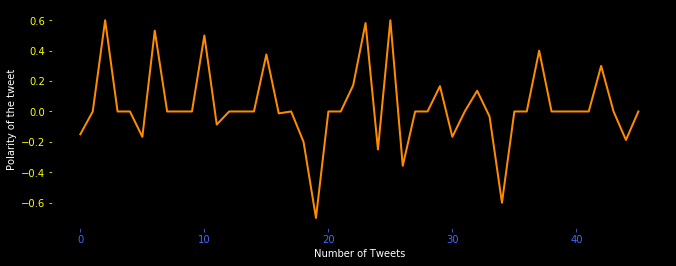

In [37]:
#########################################Plots################################3
#------------------------------LinePlot
fig, ax = plt.subplots(facecolor='#000000')
ax.grid(b=False)
plt.plot(x, color='#FF8C00')
plt.rcParams['axes.facecolor'] = "#000000"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["figure.figsize"] = [11,4]
ax.tick_params(axis='x', colors='#4666FF')
ax.tick_params(axis='y', colors='yellow')
ax.set_xlabel("Number of Tweets",color = 'white')
ax.set_ylabel("Polarity of the tweet",color = 'white')


# Be sure to specify facecolor or it won't look right in Illustrator
#fig.savefig("output.pdf", facecolor=fig.get_facecolor(), transparent=True)

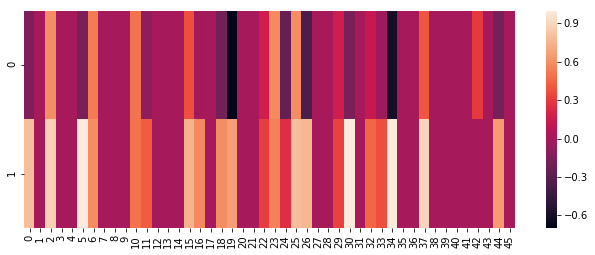

In [40]:
#----------------------------HeatPlot
sns.heatmap([x,y])  

Text(0, 0.5, 'Polarity of the tweet')

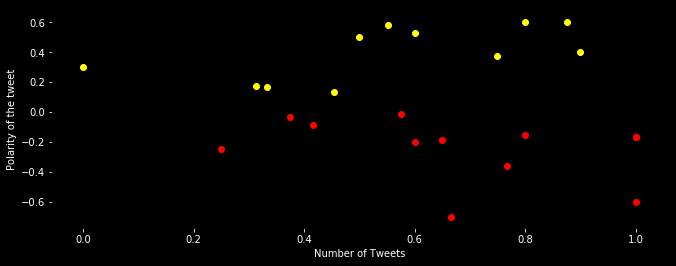

In [14]:
##POSTIVE AND NEGATIVE DIFFERENT COLORS PLX
fig, ax = plt.subplots(facecolor='#000000')
ax.grid(b=False)
plt.scatter(pos_y,pos_x, color='yellow')
plt.scatter(neg_y,neg_x, color = "red")
#plt.scatter(x,y)
plt.rcParams['axes.facecolor'] = "#000000"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["figure.figsize"] = [11,4]
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_xlabel("Number of Tweets",color = 'white')
ax.set_ylabel("Polarity of the tweet",color = 'white')


Text(0, 0.5, 'Polarity of the tweet')

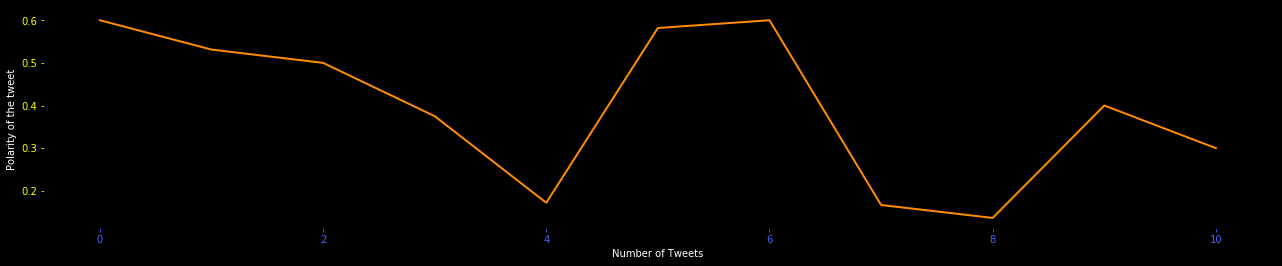

In [34]:
fig, ax = plt.subplots(facecolor='#000000')
plt.plot(pos_x, color='#FF8C00')
plt.rcParams['axes.facecolor'] = "#000000"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["figure.figsize"] = [22,4]
#plt.xticks([i*100 for i in range(30)])
ax.tick_params(axis='x', colors='#4666FF')
ax.tick_params(axis='y', colors='yellow')
ax.set_xlabel("Number of Tweets",color = 'white')
ax.set_ylabel("Polarity of the tweet",color = 'white')

In [41]:
for key, value in coord_dict.items():
    print(key , value)

us [44.51131, -84.73359, 20]
in [12.97912, 77.5913, 1]
nl [52.371009, 4.900112, 1]
au [-26.57486, 152.8657, 1]
gb [53.037718, -1.204647, 2]
ca [52.370967, -126.750674, 1]
ru [55.079018, 98.8508, 1]
es [42.61946, -7.863112, 1]


In [18]:
def ncolors(n):
    r = lambda: random.randint(0,255)
    return [('#%02X%02X%02X' % (r(),r(),r())) for _ in range(n)]

In [56]:
import branca
boulder_coords = [42.61946, -7.863112]
polygon_map = folium.Map(location = boulder_coords, zoom_start = 1)
html="""
    <h3>Tweets Info</h3>
    <pre>{} Total Tweets,
{} Positives,
{} Negatives.
    <pre>
    """.format("619","169","69")
iframe = branca.element.IFrame(html=html, width=350, height=200)
popup = folium.Popup(iframe, max_width=350)

# key+": {} tweets".format(value[-1])

colors = ncolors(len(coord_dict))
i=0
for key, value in coord_dict.items():
    folium.RegularPolygonMarker(value[:-1],  fill_color = colors[i],popup = key+": {} tweets".format(value[-1]),
                             number_of_sides = 10, radius = 8).add_to(polygon_map)
    i+=1


polygon_map.get_root().add_child(macro)
polygon_map

In [25]:
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend (draggable!)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Big</li>
    <li><span style='background:orange;opacity:0.7;'></span>Medium</li>
    <li><span style='background:green;opacity:0.7;'></span>Small</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)